# Titanic 
## Predecir supervivientes del Titanic 

### ° Definir el problema
### ° Colectar los datos
### ° Análisis Exploratorio de Datos
### ° Ingeniería de Características
### ° Selección de Características
### ° Modelado
### ° Prueba


## 1.- Definir el Problema
Que tipo de persona era probable que sobreviviera?
Aplicar herramientas de ML para predecir cuales pasajeros sobrevivirian a la tragedia.

## 2.- Collectar los datos
Desde kagle descargar test.csv y train.csv
https://www.kaggle.com/c/titanic/data


#### Cargar test y train datasets usando Pandas



In [1]:
import pandas as pd
train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

## 3.- Análisis exploratorio de datos


# Datos de entrenamineto
Los datos de entrenamiento o “training data” son los datos que usamos para entrenar un modelo.
La calidad de nuestro modelo de aprendizaje automático va a ser directamente proporcional a la calidad de los datos. Por ello las labores de limpieza, depuración o “data wrangling” consumen un porcentaje importante del tiempo.


In [2]:
train.head()
#La función Head muestra los 5 primeros registros de datos.


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


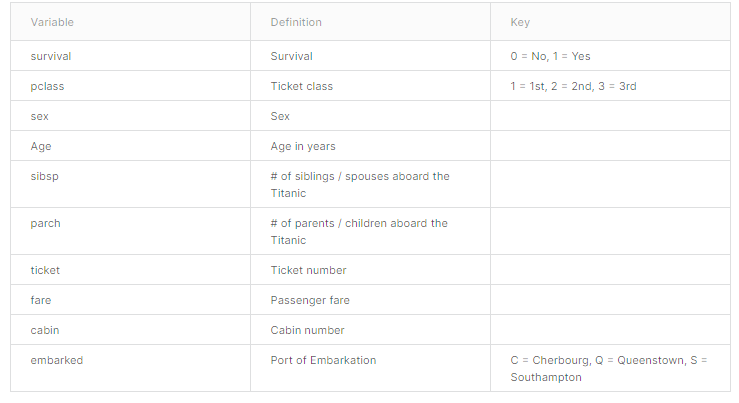

# Datos de Prueba
Los datos de prueba, validación o “testing data“ son los datos que nos “reservamos” para comprobar si el modelo que hemos generado a partir de los datos de entrenamiento “funciona”. Es decir, si las respuestas predichas por el modelo para un caso totalmente nuevo son acertadas o no.

Es importante que el conjunto de datos de prueba tenga un volumen suficiente como para generar resultados estadísticamente significativos, y a la vez, que sea representativo del conjunto de datos global.

In [3]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Como podemos apreciar, el dataset "test" contiene solo 11 columnas puesto que falta la columna "survived, de esta forma el modelo debe predecir dicha columna y su salida para cada registro de este dataset.

#### Mostrar tamaño de los datasets train y test


In [4]:
train.shape

(891, 12)

El data frame "train" esta compuesto por 891 filas y 12 columnas

In [5]:
test.shape

(418, 11)

#### .info()
Este método nos entrega un pequeño resumen estadistico de cuantos registros se tienen por cada columna y el tipo de dato que son.

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Podemos observar que a las columnas edad, cabina y embarque les hacen falta registros por lo que tenemos que considerarlo para su análisis.



#### python nos permite ejecutar mas de un metodo en un solo renglon:
la siguiente instrucción nos permite saber cuantos registros faltantes tiene cada campo 

In [7]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### Hacemos lo propio para el dataset test

In [8]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

## Importar librería para visualización

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

#### %matplotlib inline 
Establece el backend de matplotlib:
Con este backend, la salida de los comandos de trazado se muestra en línea dentro de las interfaces como el cuaderno Jupyter, directamente debajo de la celda de código que lo produjo. 


### Gráfica de barras para Variables Categóricas
* Pclass
* Sex
* SibSp(Número de herman@s o Espos@s)
* Parch(Número de Padres o hijos)
* Embarked
* Cabin



#### Nota: 
En estadística, una variable categórica es una variable que puede tomar uno de un número limitado, y por lo general fijo, de posibles valores, asignando a cada unidad individual u otro tipo observación a un grupo en particular o categoría nominal sobre la base de alguna característica cualitativa.
##### No es posible hacer aritmética con ellas. Sin embargo se puede hacer estadística con ellas.

In [11]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df= pd.DataFrame([survived,dead])
    df.index= ['Survived','Dead']
    df.plot(kind='bar',stacked=True,figsize=(10,5))

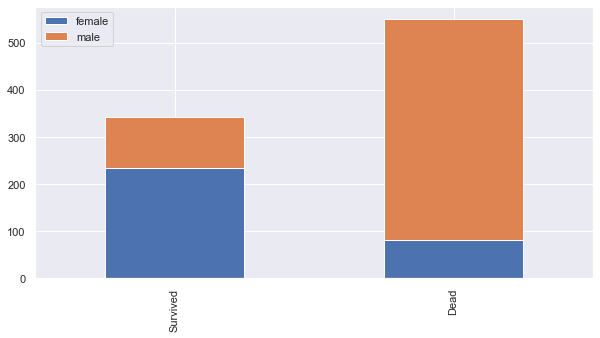

In [12]:
bar_chart('Sex')

La gráfica confirma que las mujeres tenian mayor probalidad de sobrevivir que los hombres

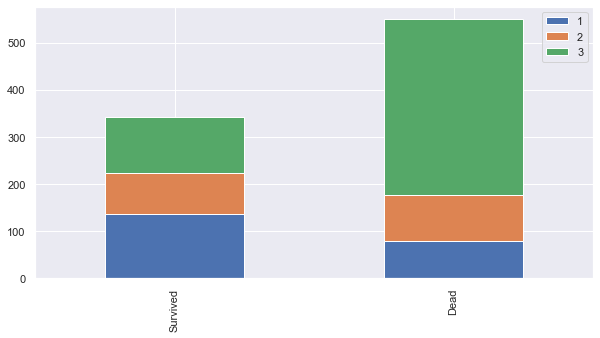

In [13]:
bar_chart('Pclass')

La gráfica confirma que habia mayor probabilidad de sobrvivir si viajabas en clase alta(1) y mayor probabilidad de morir si viajabas en clase baja

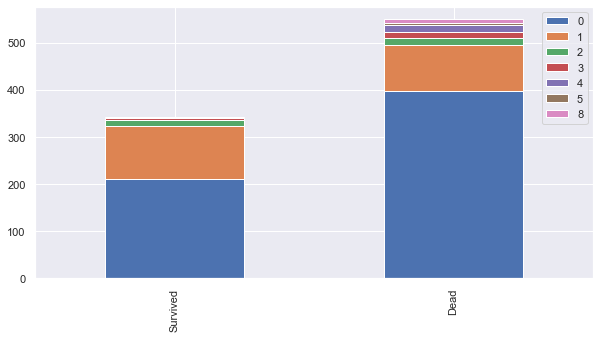

In [14]:
bar_chart('SibSp')

La gráfica confirma que las personas con mas de 2 hermanos o esposos tenian mayores probabilidades de sobrevivir
La grafica confirma que las personas sin hermanos o esposos tenian mayor probabilidad de morir

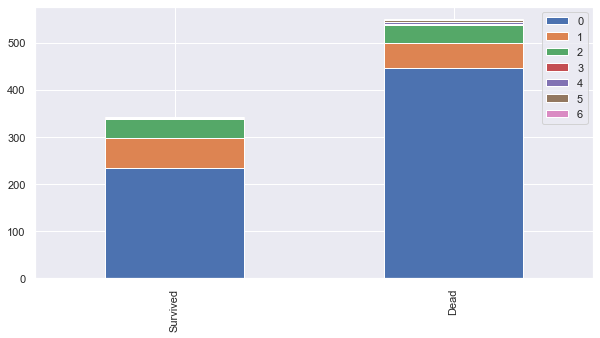

In [15]:
bar_chart('Parch')

Una persona abordo con 1 o mas padre o hijos tenia mayor probabilidad de sobrevivir que una sin padres ni hijos.

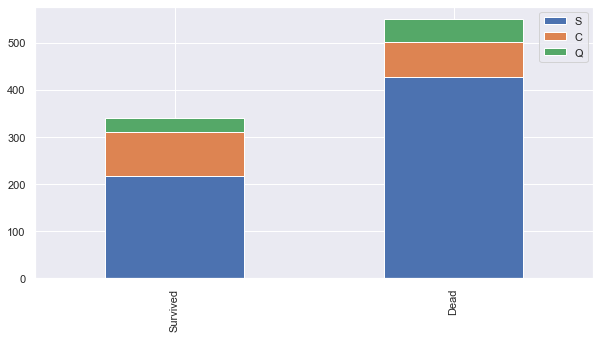

In [16]:
bar_chart('Embarked')

# 4.1 Feature engineering 
La ingeniería de características es el proceso de utilizar el conocimiento del dominio para extraer características de datos sin procesar. Una característica es una propiedad compartida por unidades independientes sobre la que se realizará el análisis o la predicción.

In [17]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


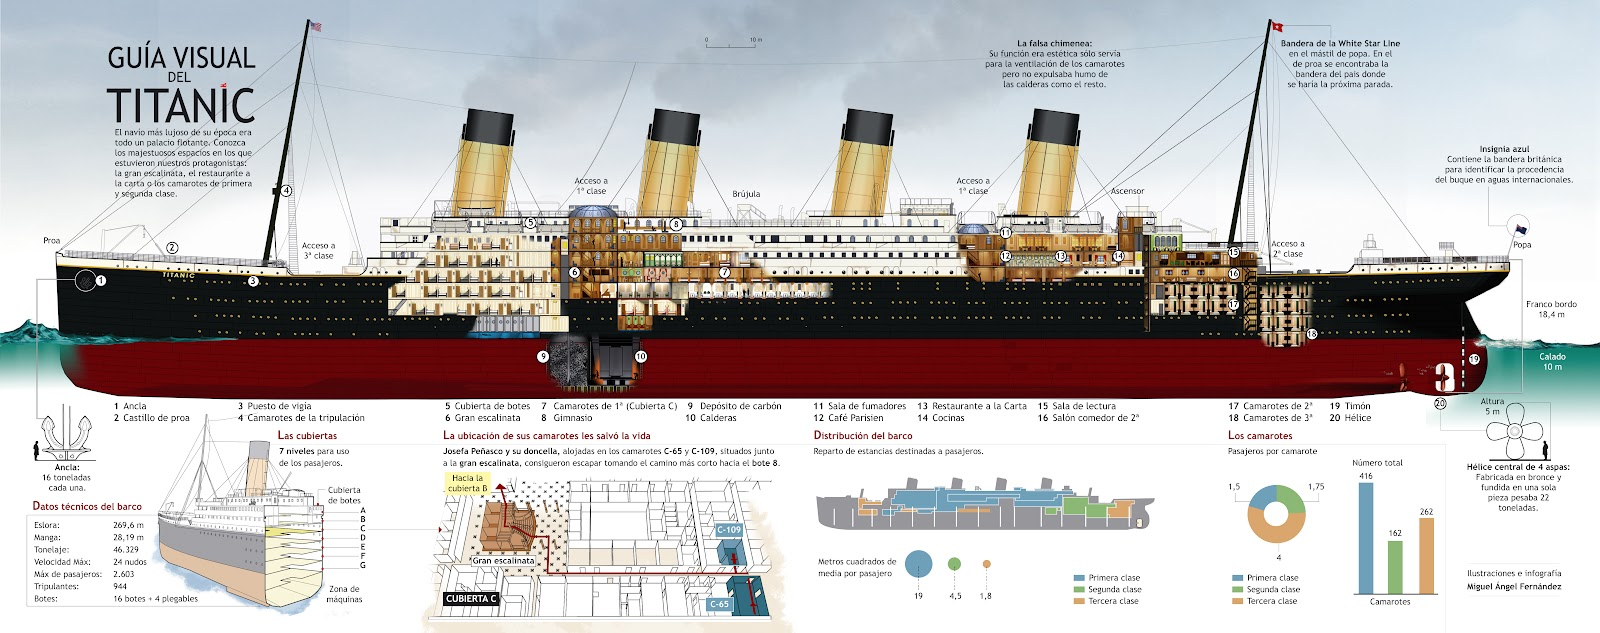

## 4.2 Name

In [18]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


La columna Name no es es muy informativa, pero podemos extraer una propiedad interesante "el rol de la persona"
si era MR. Mrs. etc.
así que lo extraeremos.
##### Primero combinaremos ambos datasets en uno.

In [19]:
train_test_data= [train,test]

In [20]:
for dataset in train_test_data:
    dataset['Title']=dataset['Name'].str.extract('([A-Za-z]+)\.',expand=False)

In [21]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Col           2
Major         2
Countess      1
Capt          1
Lady          1
Don           1
Sir           1
Jonkheer      1
Mme           1
Ms            1
Name: Title, dtype: int64

### Cambiaremos los nombres por valores, por lo que sera:

* Mr=0
* Miss=1
* Mrs=2
* Others=3

In [22]:
title_mapping ={"Mr":0,"Miss":1,"Mrs":2,
'Master':3,'Dr':3, 'Rev':3, 'Major':3,"Col":3,"Mlle":3,"Lady":3 ,"Countess":3,"Sir":3,"Ms":3,"Capt":3,"Don":3,"Mme":3,
                "Jonkheer":3    
}

In [23]:
for dataset in train_test_data:
    dataset["Title"]=dataset["Title"].map(title_mapping)

In [24]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,0
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,0
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,3
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,2


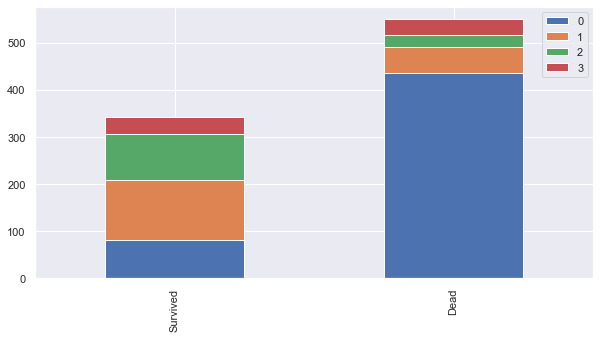

In [25]:
bar_chart("Title")

Podemos observar como las personas con titulo Mr tenian mayor probabilidad de morir que el resto

In [26]:
#eliminaremos la columna de nombre pues no nos da ningun valor
train.drop("Name",axis=1,inplace=True)
test.drop("Name",axis=1,inplace=True)

In [27]:
train.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [28]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0.0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2.0
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0.0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0.0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2.0


# 4.3 Sex 
* male:0 
* female:1

In [29]:
sex_mapping = {"male":0,"female":1}
for dataset in train_test_data:
    dataset['Sex']=dataset['Sex'].map(sex_mapping)

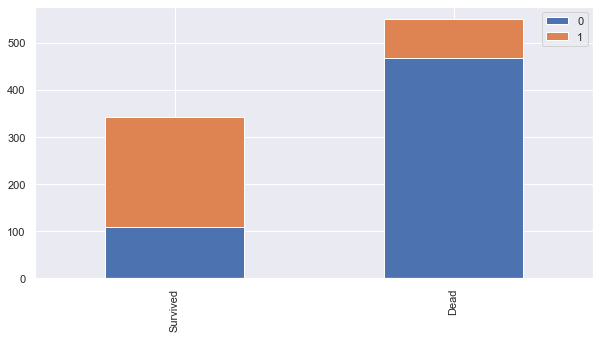

In [30]:
bar_chart("Sex")

Se realizo un cambio en la columna 'Sex', se cambiaron los valores male por 0 y female por 1.

## 4.4 Age 

#### El siguiente paso es una clave, es un truco para hayar valor en los datos
Anteriormente creamos la columna Título, la cual nos permitia agrupar a las personas por su rol social.
En el campo clave hay muchisimos valores faltantes, por lo que un paso habitual es sacar el promedio de todo el conjunto de datos y asignarlo a los valores faltantes.
Pero este paso es crucial para hacer una presición mas exacta de nuestro algoritmo, en lugar de promediar la edad total de dataset, lo haremos por los grupos asignados a la columna "Title" o Rol Social.

In [31]:
#llenaremos los valores faltantes en el campo edad por el promedio de cada "Title"(Mr,Mrs,Miss,Others)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"),inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"),inplace=True)

### Gráfico

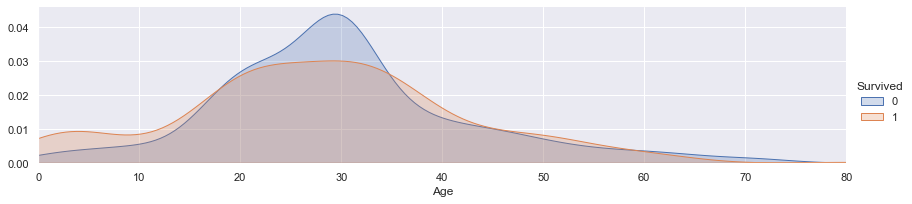

In [32]:
facet = sns.FacetGrid(train, hue="Survived", aspect=4)
facet.map(sns.kdeplot,"Age", shade=True)
facet.set(xlim=(0,train["Age"].max()))
facet.add_legend()
plt.show()

# 4.4.2 Binning
Binning/Convertir la edad numerica en Variable Categorica
* child:0
* young:1
* adult:2
* mid_age:3
* senior: 4

In [33]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age']= 0
    dataset.loc[(dataset['Age']>16) & (dataset['Age']<=26),"Age"] = 1
    dataset.loc[(dataset['Age']>26) & (dataset['Age']<=36),"Age"] = 2
    dataset.loc[(dataset['Age']>36) & (dataset['Age']<=62),"Age"] = 3            
    dataset.loc[ dataset['Age']>62,"Age"]=4

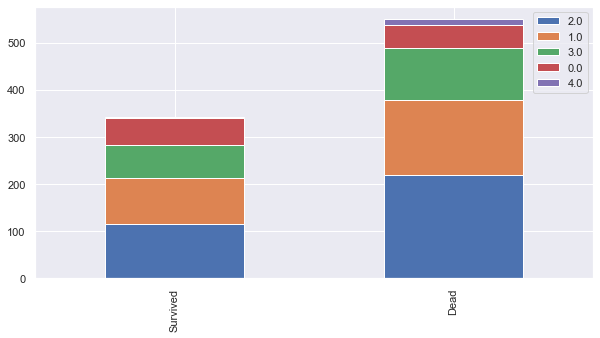

In [34]:
bar_chart("Age")

In [35]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


#### Convertir la cabina en variable numerica

In [36]:
cabin_mapping = {"A":0,"B":0.4,"C":0.8,"D":1.2,"F":1.6,"G":2,"H":2.4,"T":2.8}
for dataset in train_test_data:
    dataset['Cabin']=dataset['Cabin'].map(cabin_mapping)

In [37]:
#LLenar los valores faltantes con el promedio